### 神经网络 隐含层+激活函数 拟合 非线性回归

In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
import torch.nn.functional as F

In [2]:
x = torch.unsqueeze(torch.linspace(-3, 3, 10000), dim=1)
y = x.pow(3) + 0.3 * torch.rand(x.size())

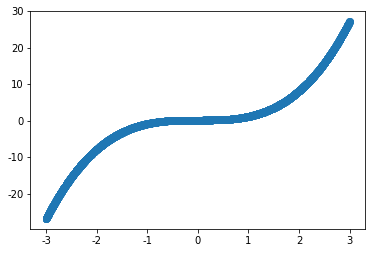

In [3]:
plt.scatter(x.numpy(), y.numpy())

* 激活函数的出现是为了让神经网络可以拟合复杂的非线性函数，激活函数 f 本身是一个非常简单的非线性函数，但只要多个带有激活函数的神经元组合在一起，就具有拟合复杂非线性函数的强大能力！常用的激活函数有 sigmoid, tanh, ReLU 和 Maxout 等
* 输入层 + n * 隐含层 + 输出层; 隐含层神经元是我们进行大部分计算的区域，隐含层约复杂，所能模拟的非线性函数就约复杂，凡是 n >= 2 的神经网络，都可以叫做 深度神经网络

In [4]:
class Net(nn.Module):
    def __init__(self, num_input, num_hidden, num_output):
        # num_hidden 隐含层数量
        super(Net, self).__init__()
        self.hidden = nn.Linear(num_input, num_hidden)
        self.out = nn.Linear(num_hidden, num_output)
    
    def forward(self, x):
        # 使用 ReLU 作为非线性激活函数
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x

In [8]:
inputs = x
target = y
model = Net(inputs.numpy().shape[1], 20, target.numpy().shape[1])

In [9]:
def train(model, inputs, target, epochs, learning_rate=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        output = model(inputs)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 200 == 0:
            draw(inputs, target, output, loss)
    return model, loss, output

def draw(inputs, target, output, loss):
    plt.cla()
    plt.scatter(inputs.numpy(), target.numpy())
    plt.plot(inputs.numpy(), output.data.numpy(), 'r-', lw=5)
    plt.text(0.5, -15, 'loss=%s' % (loss.item()), fontdict={'size':20, 'color':'red'})
    plt.pause(0.05)

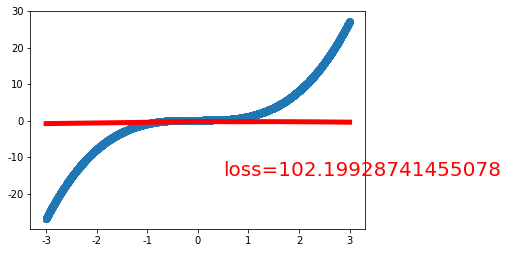

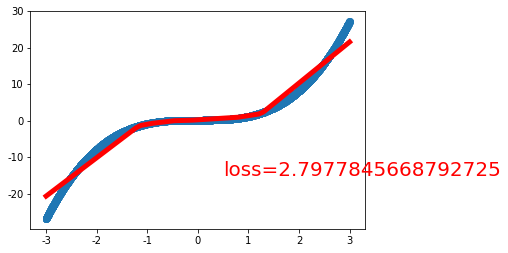

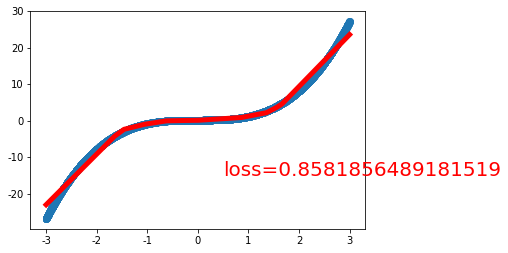

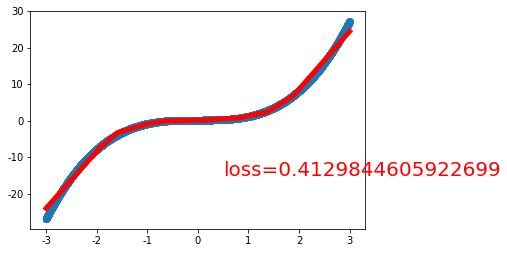

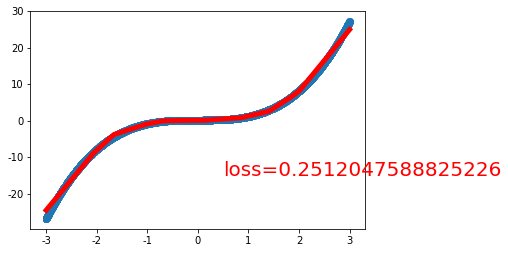

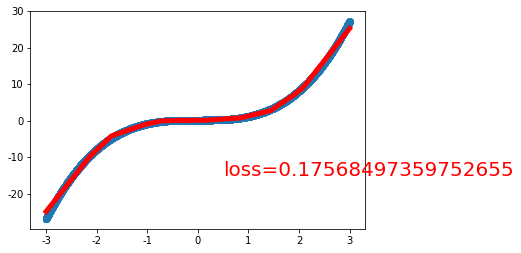

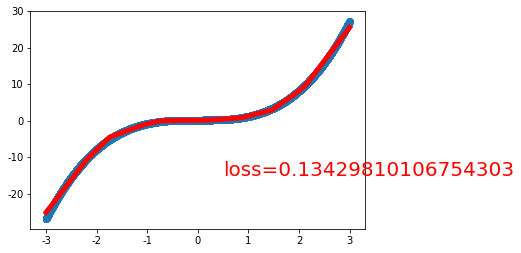

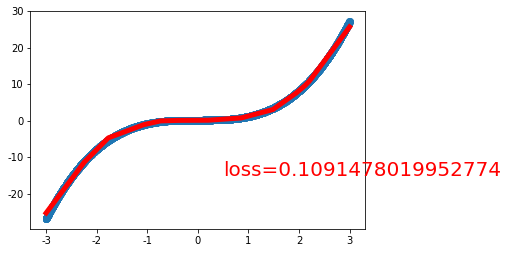

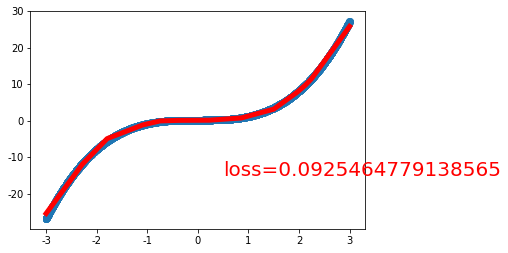

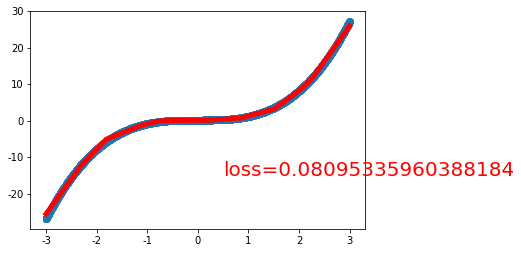

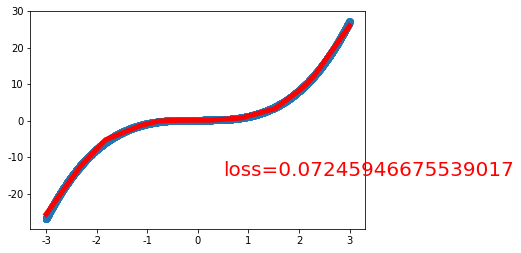

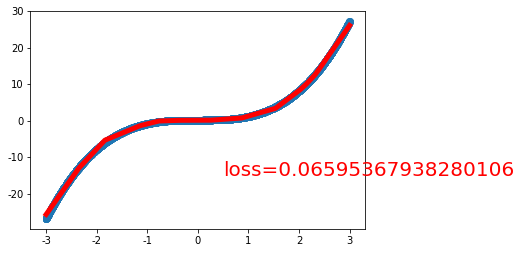

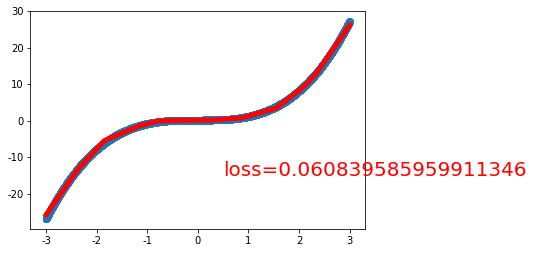

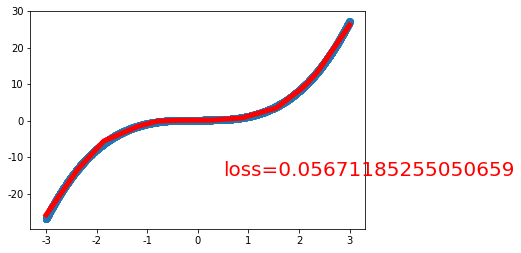

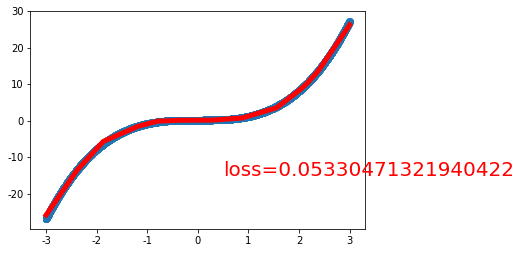

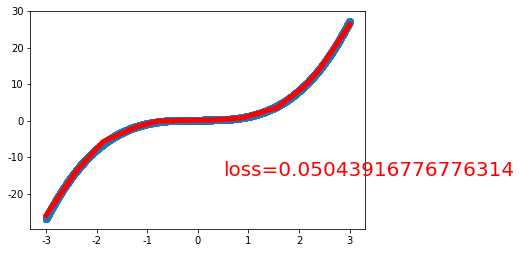

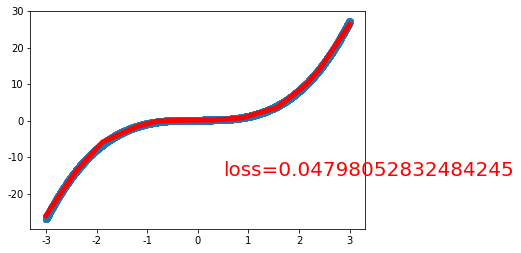

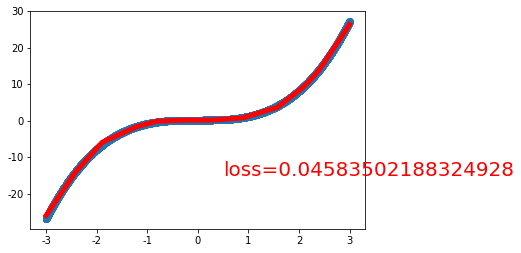

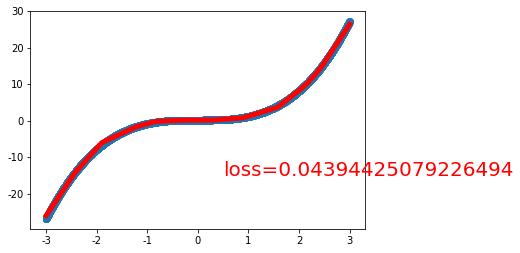

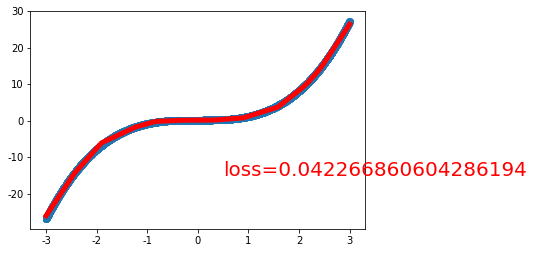

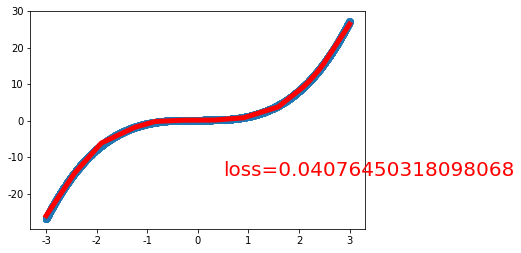

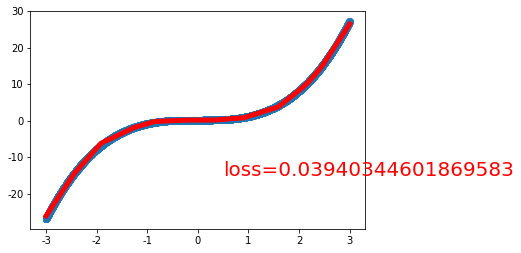

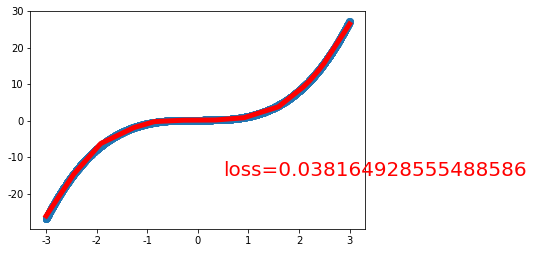

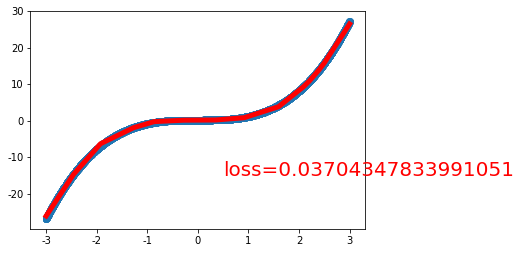

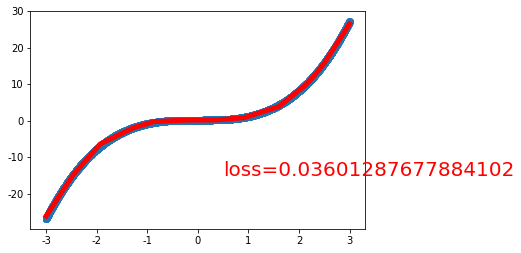

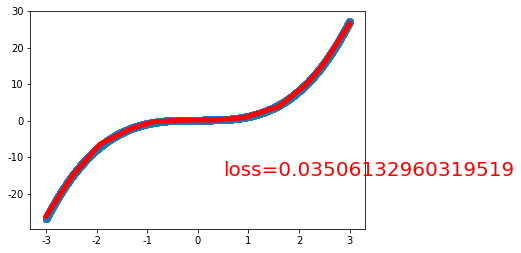

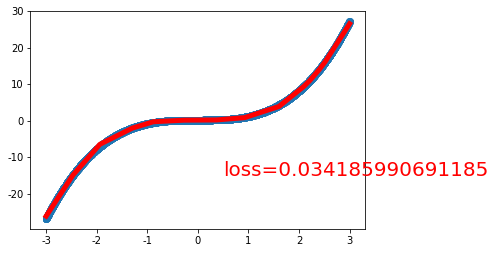

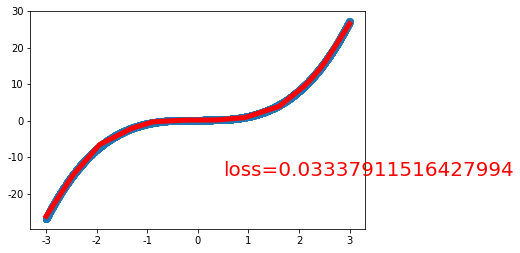

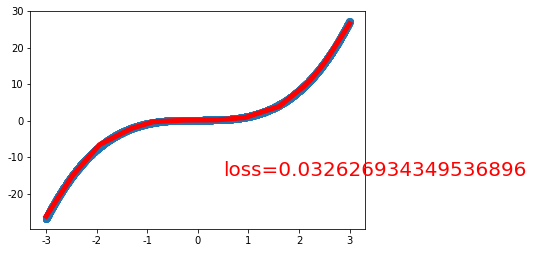

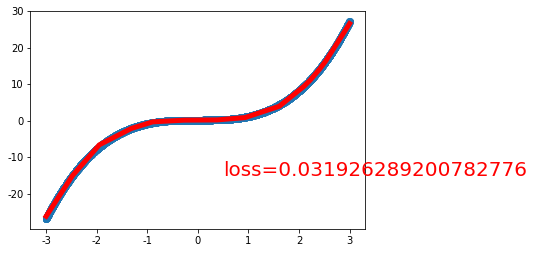

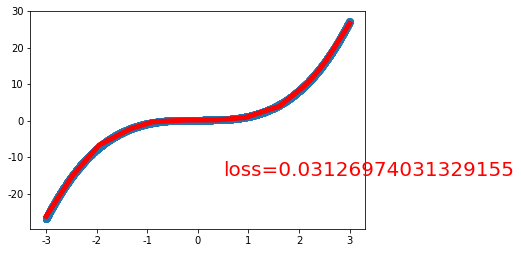

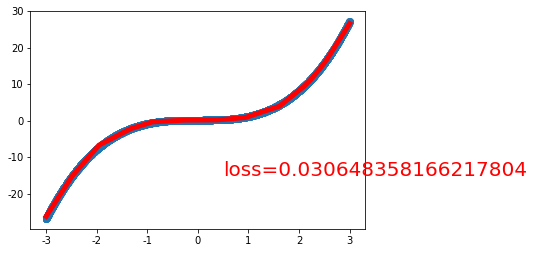

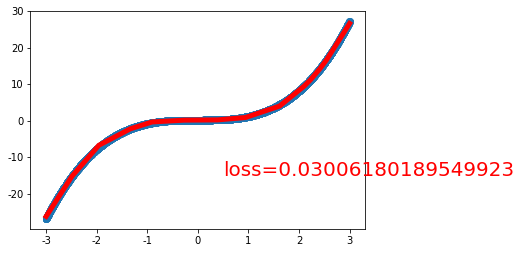

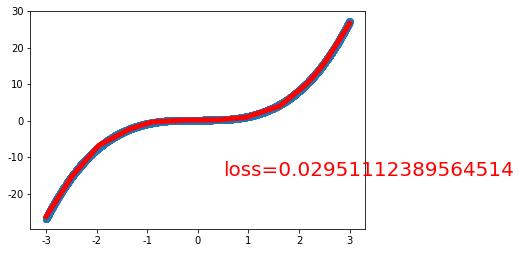

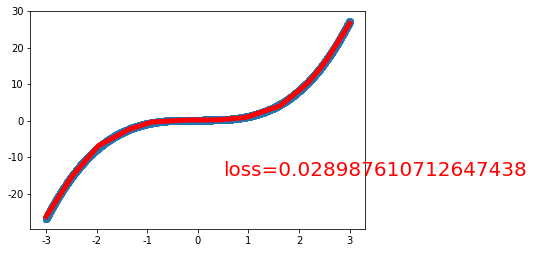

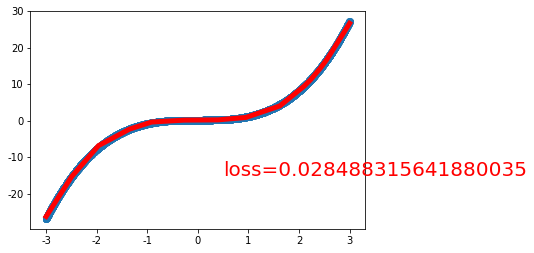

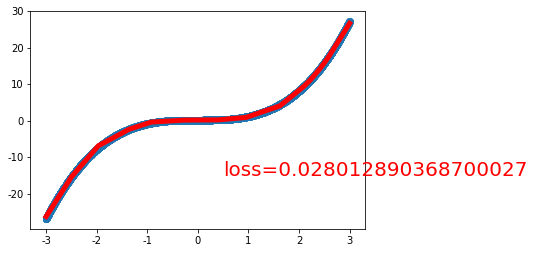

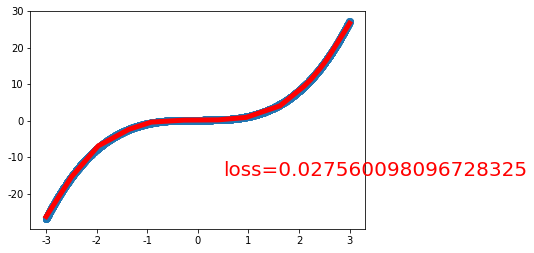

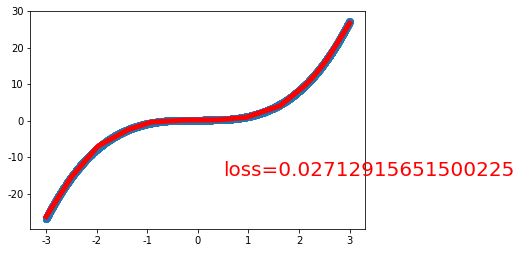

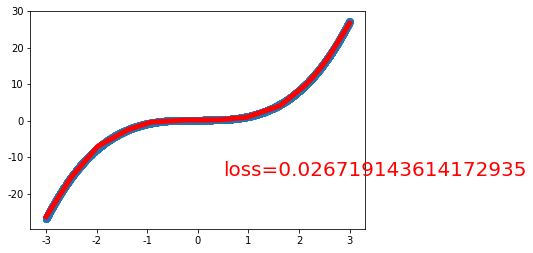

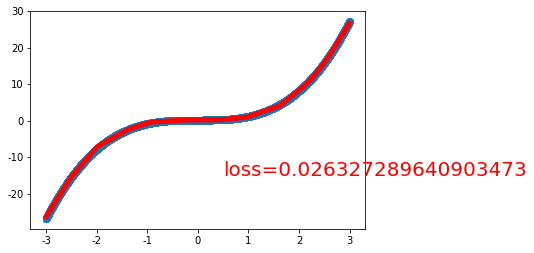

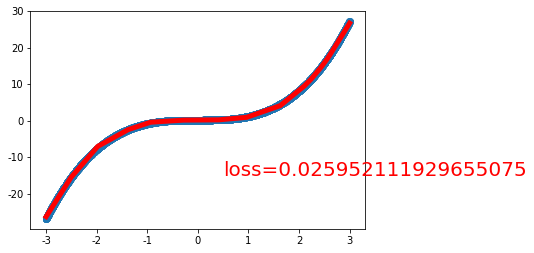

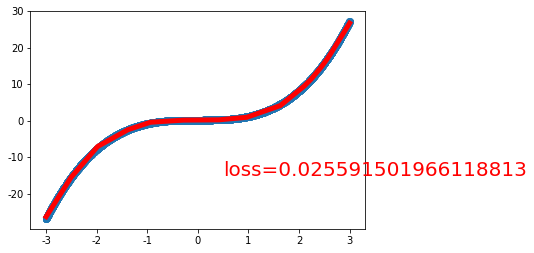

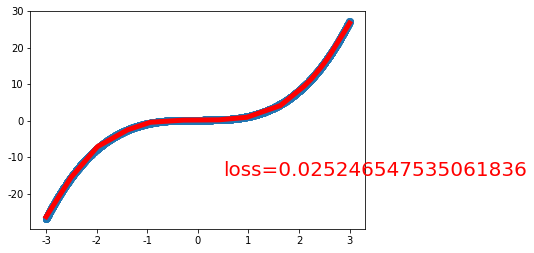

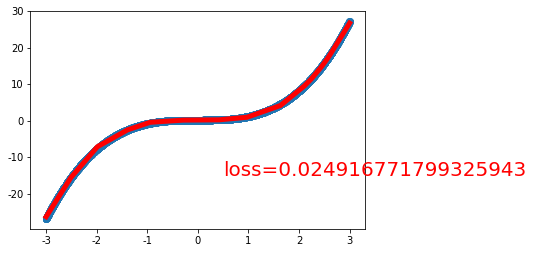

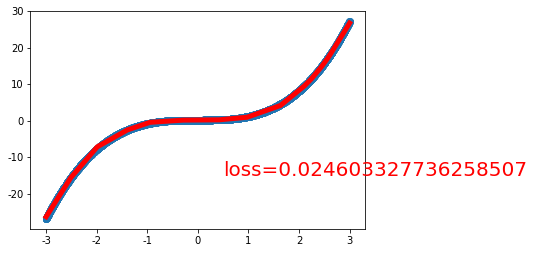

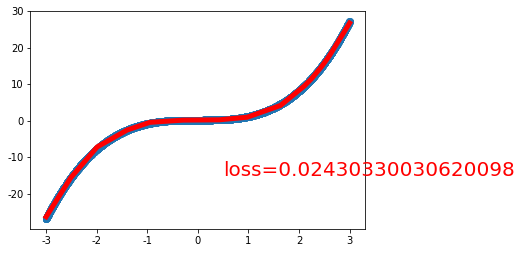

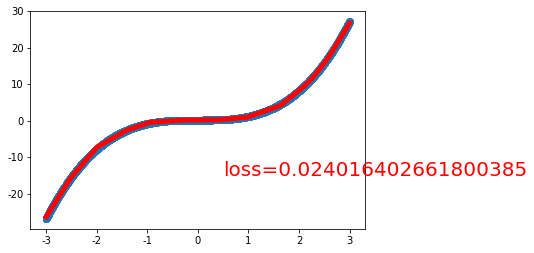

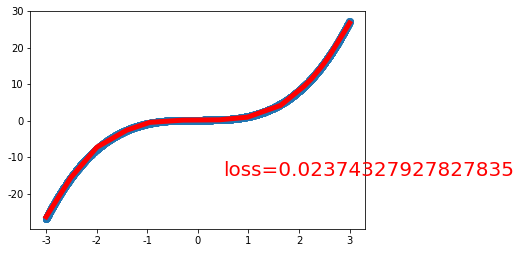

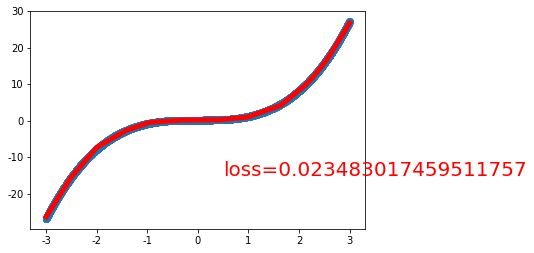

CPU times: user 45.4 s, sys: 1min 10s, total: 1min 56s
Wall time: 1min 12s


In [10]:
%%time
model, loss , output= train(model, inputs, target, 10000)

In [12]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.8718],
         [-0.2330],
         [ 1.1257],
         [-1.7285],
         [ 0.9203],
         [-0.1022],
         [-0.0959],
         [ 0.8877],
         [ 1.8583],
         [-0.8836],
         [-1.0142],
         [ 1.6857],
         [ 1.2288],
         [-1.3637],
         [-0.0527],
         [-0.0906],
         [-1.9349],
         [ 0.2395],
         [ 1.0520],
         [-1.5028]], requires_grad=True), Parameter containing:
 tensor([-2.2301,  0.8874, -2.5119, -1.6705, -2.2295, -0.5875, -0.5377, -2.3166,
         -3.0344,  0.5809, -0.3421, -1.6370, -0.4977, -1.9438,  0.1578, -0.3825,
         -3.8742, -0.7185, -2.1977, -3.7976], requires_grad=True), Parameter containing:
 tensor([[ 2.2720, -0.0332,  2.5112, -2.2000,  2.2444, -0.0743,  0.1027,  2.2664,
           3.4102, -0.0816, -0.9124,  2.2021,  0.9631, -2.3489, -0.0970,  0.1339,
          -4.2543, -0.1399,  2.2889, -3.9359]], requires_grad=True), Parameter containing:
 tensor([0.2428], requires_